# Prediction of missing values

In [105]:
import missingno as msno
import pandas as pd

In [106]:
df = pd.read_csv("dataset.csv", encoding='latin-1') #data src: https://www.kaggle.com/datasets/jmataya/missingmigrants
df

,age,gender,weight,salary,height
0,54.0,M,100.0,59073.02,196
1,57.0,M,51.7,91981.42,177
2,44.0,M,94.3,43037.00,177
3,42.0,M,83.4,49766.42,173
4,37.0,M,82.2,84871.58,186
...,...,...,...,...,...
95,45.0,M,71.2,93915.33,172
96,NaN,F,70.7,46465.07,154
97,55.0,F,59.3,66958.52,180
98,32.0,F,90.7,47718.31,163


In [107]:
df["gender"] = [1 if x == "M" else 0 if x == "F" else None for x in df["gender"]]
df

,age,gender,weight,salary,height
0,54.0,1,100.0,59073.02,196
1,57.0,1,51.7,91981.42,177
2,44.0,1,94.3,43037.00,177
3,42.0,1,83.4,49766.42,173
4,37.0,1,82.2,84871.58,186
...,...,...,...,...,...
95,45.0,1,71.2,93915.33,172
96,NaN,0,70.7,46465.07,154
97,55.0,0,59.3,66958.52,180
98,32.0,0,90.7,47718.31,163


<Axes: >

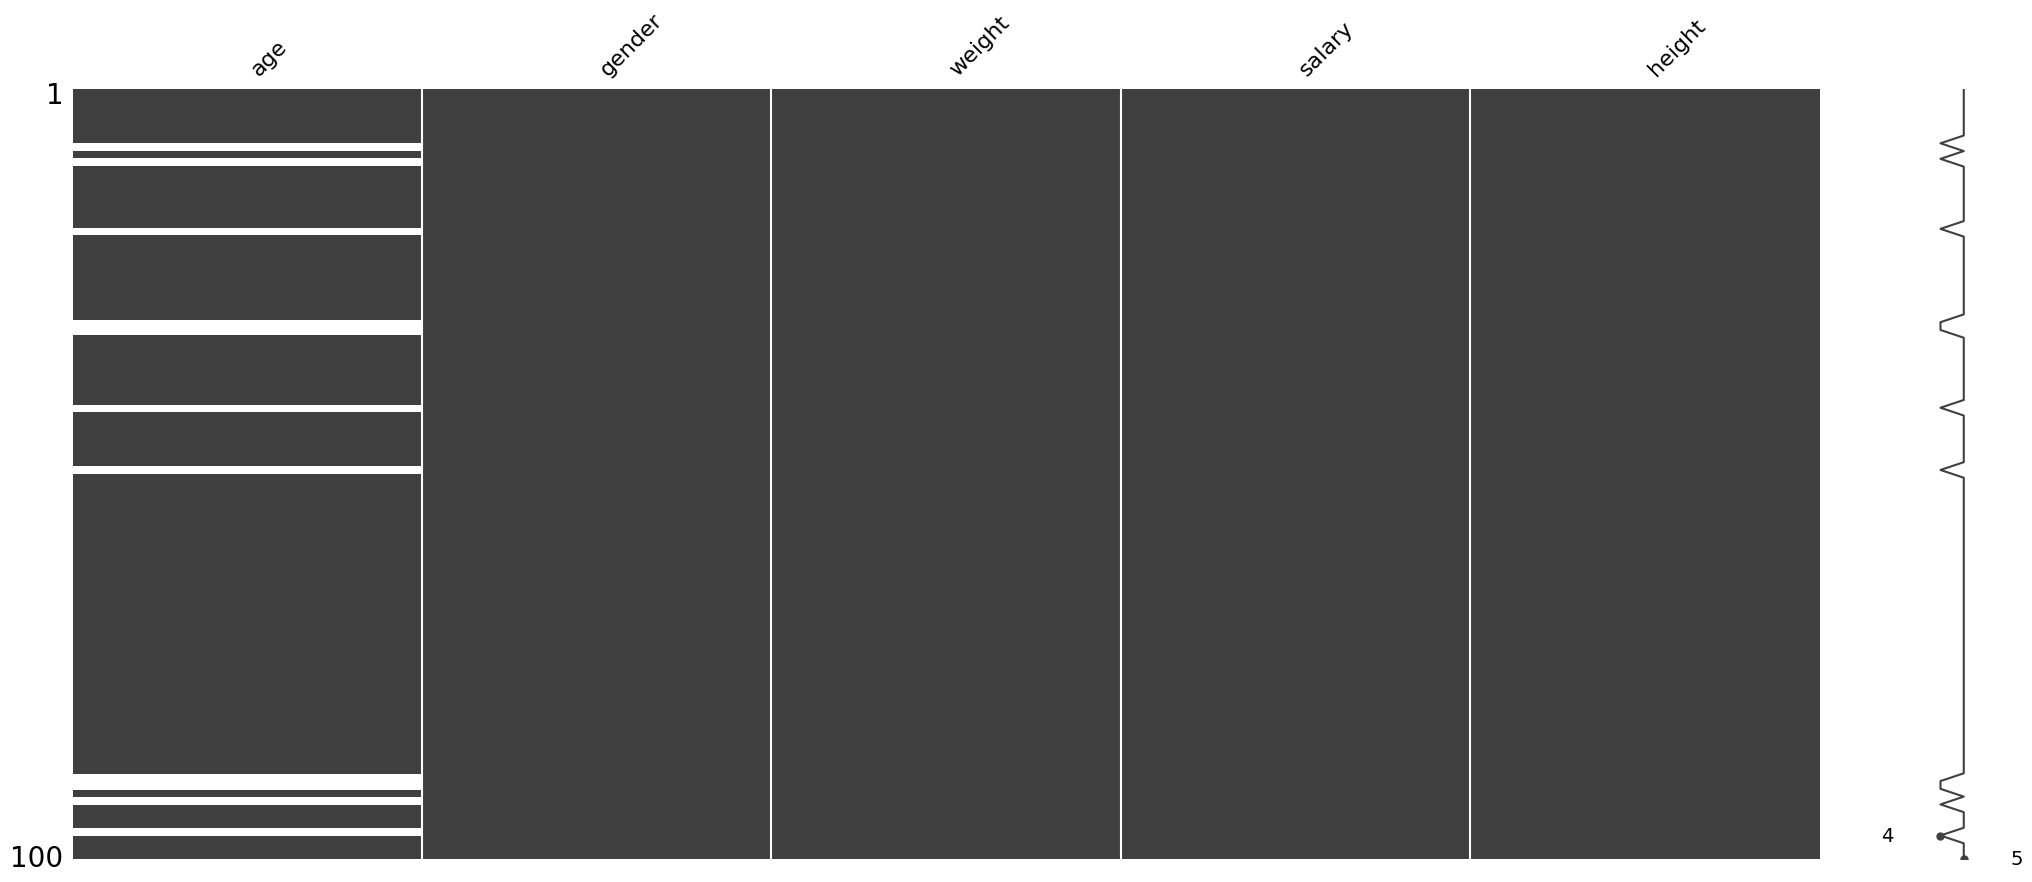

In [108]:
msno.matrix(df)

In [109]:
data_with_age = df.dropna(subset=["age"])
data_without_age = df[df["age"].isnull()]

In [110]:
X_train = data_with_age.drop(columns=["age"])
y_train = data_with_age["age"]

In [111]:
reg_model = LinearRegression()  # Here, we can use any prediction machine Learning model.
reg_model.fit(X_train, y_train)

LinearRegression()

In [112]:
X_test = data_without_age.drop(columns=["age"])
predicted_age = reg_model.predict(X_test)


df.loc[df["age"].isnull(), "age"] = predicted_age

In [113]:
df

,age,gender,weight,salary,height
0,54.00000,1,100.0,59073.02,196
1,57.00000,1,51.7,91981.42,177
2,44.00000,1,94.3,43037.00,177
3,42.00000,1,83.4,49766.42,173
4,37.00000,1,82.2,84871.58,186
...,...,...,...,...,...
95,45.00000,1,71.2,93915.33,172
96,40.12488,0,70.7,46465.07,154
97,55.00000,0,59.3,66958.52,180
98,32.00000,0,90.7,47718.31,163


<Axes: >

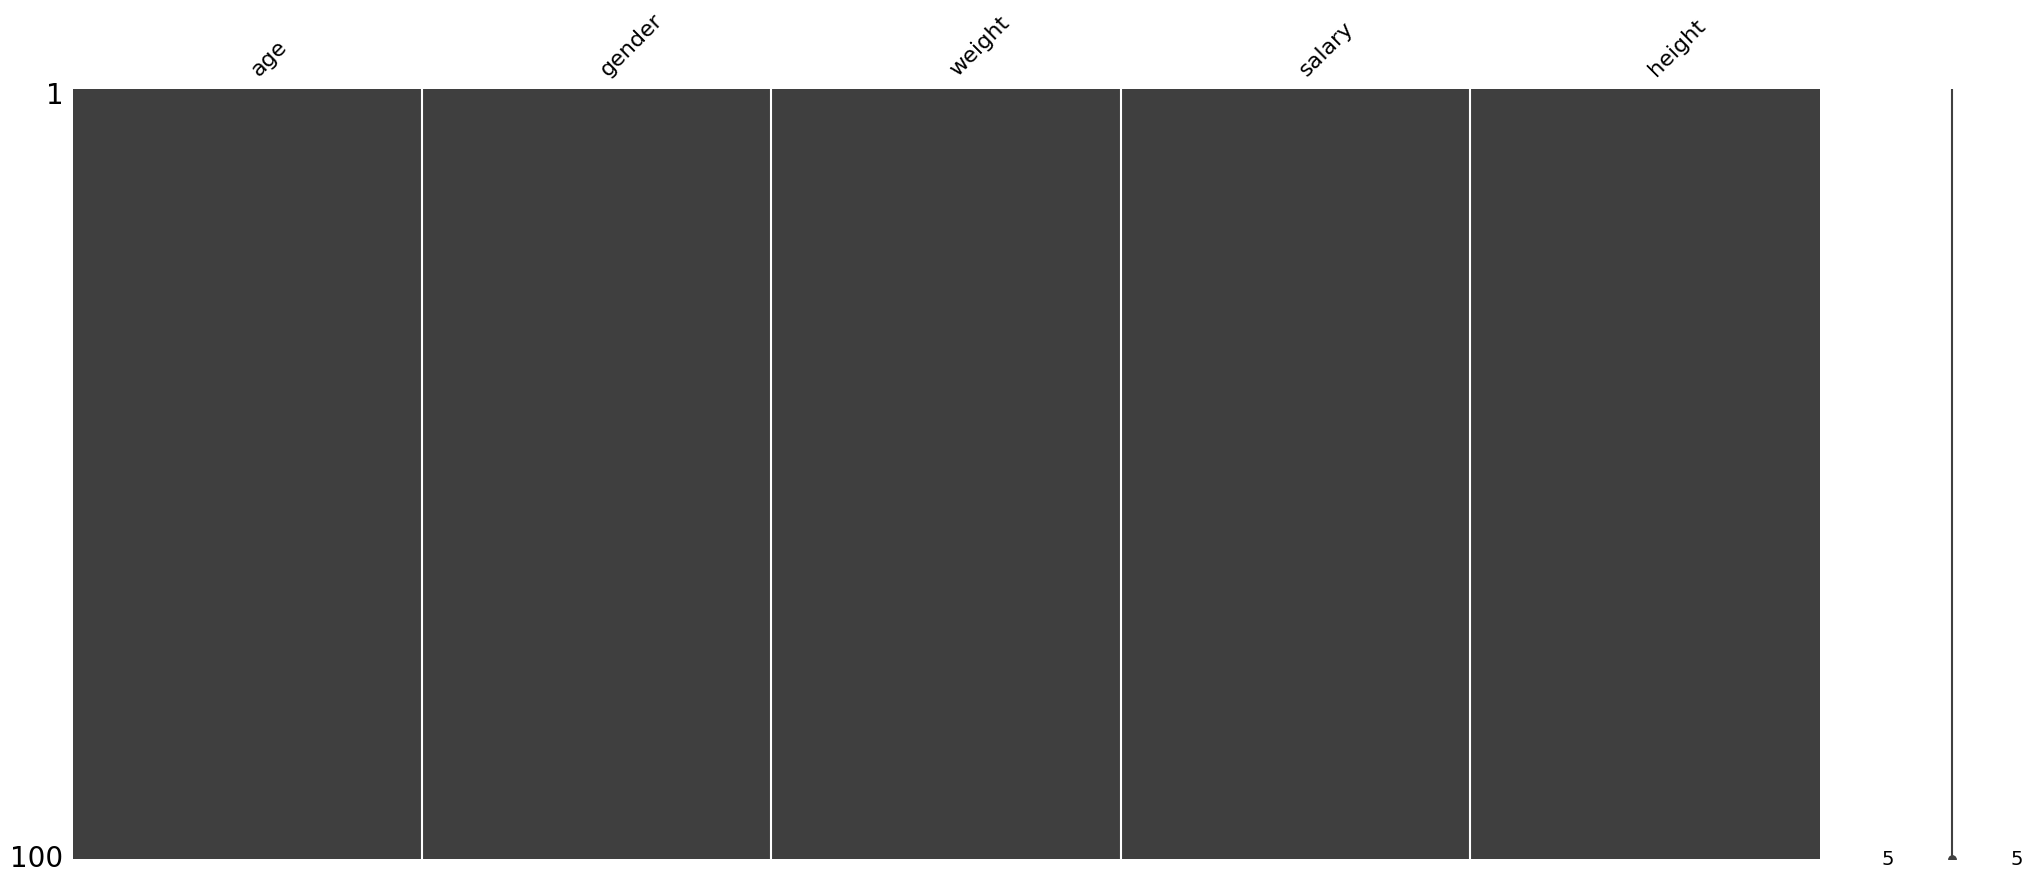

In [115]:
msno.matrix(df)

# Done, Thanks to visit, 
# Wish you luck in this field ✨